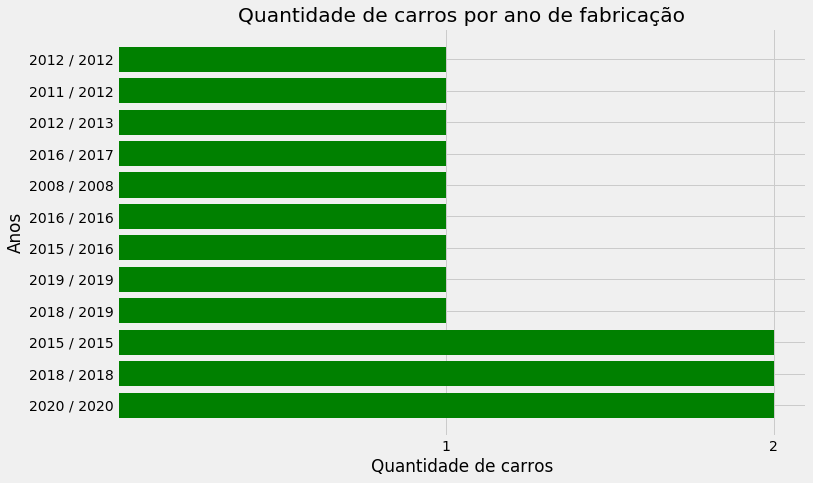

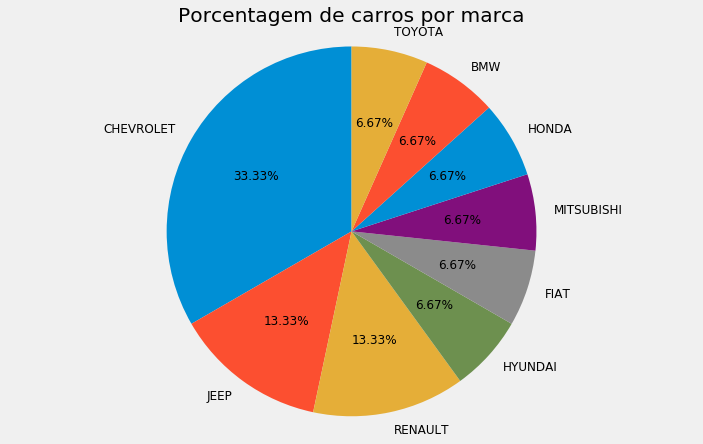

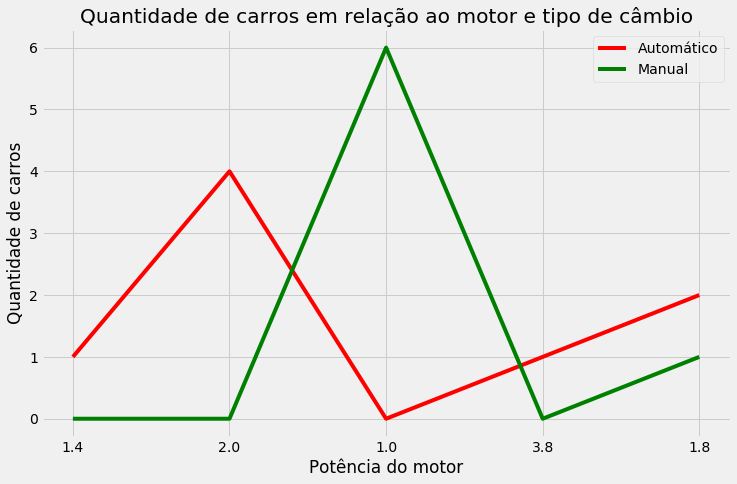

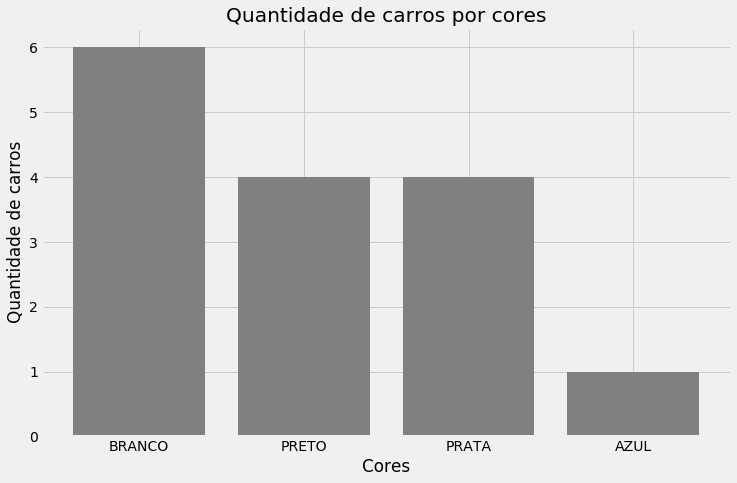

,Marca,Ano,Cor,Motor,Quilometragem,Tipo_de_transmissao
0,CHEVROLET,2016 / 2017,BRANCO,1.4,48000,AUTOMÁTICO
1,HONDA,2020 / 2020,BRANCO,2.0,8000,AUTOMÁTICO
2,TOYOTA,2018 / 2018,BRANCO,2.0,41150,AUTOMÁTICO
3,FIAT,2012 / 2012,PRETO,1.0,89000,MANUAL
4,HYUNDAI,2011 / 2012,PRATA,3.8,45980,AUTOMÁTICO
5,CHEVROLET,2015 / 2015,PRATA,1.8,49880,AUTOMÁTICO
6,MITSUBISHI,2015 / 2016,PRETO,2.0,57240,AUTOMÁTICO
7,JEEP,2016 / 2016,BRANCO,1.8,44060,MANUAL
8,CHEVROLET,2012 / 2013,PRETO,1.0,71000,MANUAL
9,BMW,2015 / 2015,PRATA,2.0,46935,AUTOMÁTICO


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import math

class Data:
    def __init__(self, ano, cor, motor, quilometragem, marca, tipo_de_transmissao):
        self.ano = ano
        self.cor = cor
        self.motor = motor
        self.quilometragem = quilometragem
        self.marca = marca
        self.tipo_de_transmissao = tipo_de_transmissao
        
class Carros(Data):
    def __init__(self, modelo, ano, cor, motor, quilometragem, marca, tipo_de_transmissao):
        self.char = Data(ano, cor, motor, quilometragem, marca, tipo_de_transmissao)
        self.modelo = modelo
    def get_ano(self):
        return self.char.ano
    def get_cor(self):
        return self.char.cor
    def get_motor(self):
        return self.char.motor
    def get_quilometragem(self):
        return self.char.quilometragem
    def get_marca(self):
        return self.char.marca
    def get_tipodetransmissao(self):
        return self.char.tipo_de_transmissao
    def get_modelo(self):
        return self.modelo
    
def gerar_dataframe(carros):
    ano = []
    cor = []
    motor = []
    quilometragem = []
    marca = []
    tipo_de_transmissao = []
    for i in carros:
        ano.append(i.get_ano().upper())
        cor.append(i.get_cor().upper())
        motor.append(i.get_motor().upper())
        quilometragem.append(i.get_quilometragem().upper())
        marca.append(i.get_marca().upper())
        tipo_de_transmissao.append(i.get_tipodetransmissao().upper())
    dic = {'Marca': marca, 'Ano': ano, 'Cor': cor, 'Motor': motor, 'Quilometragem': quilometragem,'Tipo_de_transmissao': tipo_de_transmissao}
    df = pd.DataFrame(data = dic)
    return df

def plotar_grafico_barras(freq):
    x = freq.index
    y = freq.values
    plt.title('Quantidade de carros por ano de fabricação')
    plt.xlabel('Quantidade de carros')
    plt.ylabel('Anos')
    plt.xticks(range(min(y), math.ceil(max(y))+1))
    plt.barh(x,y, color ='green')
    plt.savefig('Quantidade_de_carros_por_ano_de_fabricacao.png', transparent = False)
    plt.show()
    
def plotar_grafico_pizza(freq):
    fig1, ax1 = plt.subplots()
    ax1.pie(freq.values, labels=freq.index, autopct='%.2f%%', shadow=False, startangle=90, textprops={"fontsize":12})
    ax1.axis('equal')
    plt.title('Porcentagem de carros por marca')
    plt.savefig('Porcentagem_de_carros_por_marca.png', transparent = False)
    plt.show()
    
def plotar_grafico_linha(df):
    x = []
    motores = df['Motor']
    for i in motores:
        add = True
        for j in x:
            if(j == i):
                add = False
        if(add):
            x.append(i)
    transmissao = df['Tipo_de_transmissao']
    automatico = [0]*len(x)
    manual = [0]*len(x)
    for i in range(0,len(motores)):
        if(transmissao[i] == "AUTOMÁTICO"):
            for j in range(0,len(x)):
                if(x[j] == motores[i]):
                    automatico[j] = automatico[j] + 1
        else:
            for j in range(0,len(x)):
                if(x[j] == motores[i]):
                    manual[j] = manual[j] + 1
    plt.title('Quantidade de carros em relação ao motor e tipo de câmbio')
    plt.plot(x, automatico, color = 'red', label = 'Automático')
    plt.plot(x, manual, color = 'green', label = 'Manual')
    plt.legend()
    plt.xlabel('Potência do motor')
    plt.ylabel('Quantidade de carros')
    plt.grid(True)
    plt.savefig('Quantidade_de_carros_em_relacao_ao_motor_e_tipo_de_cambio.png', transparent = False)
    plt.show()

def plotar_grafico_agrupadas(df):
    cores = df['Cor'].value_counts()
    plt.title('Quantidade de carros por cores')
    plt.bar(cores.index, cores.values, color = 'grey')
    plt.xlabel('Cores')
    plt.ylabel('Quantidade de carros')
    plt.savefig('Quantidade_de_carros_por_cores.png', transparent = False)
    plt.show()
    
txt_files = glob.glob("test*.txt")#gerando array com nome de todos os arquivos no diretório atual com formato txt
#e começando com test

carros = []#array onde irei salvar as informaçoes necessárias de cada arquivo através de uma classe
for i in txt_files:
    refarquivo = open(i,'r', errors='ignore', encoding = 'utf8')#utf8
    firstline = refarquivo.readline()
    firstline = firstline.replace("\n", "")
    if (firstline == "Categoria"):
        refarquivo.readline()
        for linha in refarquivo:
            linha = linha.replace("\n", "")
            tipo = linha
            linha = refarquivo.readline().replace("\n", "")
            if(tipo == "Modelo"):
                modelo = linha
                #print(linha)
            elif(tipo == "Marca"):
                marca = linha
                #print(linha)
            elif(tipo == "Ano"):
                ano = linha
                #print(linha)
            elif(tipo == "Quilometragem"):
                quilometragem = linha
                #print(linha)
            elif(tipo == "Cor"):
                cor = linha
                #print(linha)
            elif(tipo == "Potência do motor"):
                motor = linha
                #print(linha)
            elif(tipo == "Câmbio"):
                tipo_de_transmissao = linha
                #print(linha)
        carro = Carros(modelo, ano, cor, motor, quilometragem, marca, tipo_de_transmissao)
        carros.append(carro)
        #print("\n")
    else:
        modelo = firstline
        #print(modelo)
        firstline = firstline.split()
        marca = firstline[0]
        #print(marca)
        refarquivo.readline()
        for linha in refarquivo:
            linha = linha.replace("\n", "")
            if(linha == "ANO"):
                linha = refarquivo.readline().replace("\n","")
                ano = linha
                #print(linha)
            elif(linha == "KM"):
                linha = refarquivo.readline().replace("\n","")
                quilometragem = linha
                #print(linha)
            elif(linha == "COR"):
                linha = refarquivo.readline().replace("\n","")
                cor = linha
                #print(linha)
            elif(linha.find("Motor: ") > -1):
                tam = linha.find("Motor: ")
                linha = linha[tam:].split(" ")
                motor = linha[1]
                #print(motor)
                tipo_de_transmissao = linha[3]
                #print(tipo_de_transmissao)
                break
        carro = Carros(modelo, ano, cor, motor, quilometragem, marca, tipo_de_transmissao)
        carros.append(carro)
        #print("\n")
        
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)       
df = gerar_dataframe(carros)
df = df.replace('GM - CHEVROLET', 'CHEVROLET')
df = df.replace('2018 /   2018', '2018 / 2018')
df = df.replace('2.0 ','2.0')
freq = df['Ano'].value_counts()
plotar_grafico_barras(freq)
freq = df['Marca'].value_counts()
plotar_grafico_pizza(freq)
plotar_grafico_linha(df)
plotar_grafico_agrupadas(df)
df